# 05 데이터 분석 기초! - 데이터 파악하기, 다루기 쉽게 수정
> ## 학습목표
> ### 05-1 데이터 파악하기
> ### 05-2 변수명 바꾸기
> ### 05-3 파생변수 만들기


## Lab 1 데이터의 전반적인 구조를 파악하기

데이터가 주어졌을 때 가장 먼저하는일은 데이터의 전반적인 구조를 파악하는 일이다.
- 어떤 변수(컬럼) 들이 있는가 ?
- 몇 개의 행으로 구성되어 있는가 ?
- 대략적인 통계량

### 전반적인 데이터 구조 파악을 위한 Pandas  함수
- head() : 데이터 앞 부분 출력
- tail() : 데이터 뒷 부분 출력
- shape : 행, 열 개수 출력
- info() : 변수 속성 출력
- describe() : 요약 통계량 출력
---

In [1]:
# pandas를 사용하기 위해 Pandas 패키지를 로드
import pandas as pd

In [2]:
# csv 유형의 exam.csv 파일을 읽어와서 exam 데이터 프레임으로 저장
exam = pd.read_csv('exam.csv')

> head() - 데이터 앞 부분 확인
> tail() - 데이터 뒷 부분 확인

In [3]:
# 앞에서 5개 행 출력, 데이터의 형태를 추정함
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [4]:
exam.head(10) # 앞에서 10개 행 출력

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [5]:
exam.tail()  # 마지막 5개 데이터 출력

,id,nclass,math,english,science
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


In [6]:
exam.tail(10) # 마직막 10개 데이터 출력

,id,nclass,math,english,science
10,11,3,65,65,65
11,12,3,45,85,32
12,13,4,46,98,65
13,14,4,48,87,12
14,15,4,75,56,78
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


> shape - 데이터의 크기(행과 열의 구성) 알아보기
- shape는 데이터 프레임의 속성(attribute)임 / 함수가 아님

In [7]:
# 함수 아니고 속성 값임에 주의
# 행의 수는 20, 컬럼(변수)의 수는 4개임을 확인
exam.shape  

(20, 5)

> info() 변수 속성 파악하기

In [8]:
# 컬럼의 이름 확인
exam.columns

Index(['id', 'nclass', 'math', 'english', 'science'], dtype='object')

In [9]:
# 각 컬럼의 결측치(NULL) 값이 아닌 데이터 값 개수와 데이터 타입을 확인 가능
# 각 컬럼의 속송 확인
exam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       20 non-null     int64
 1   nclass   20 non-null     int64
 2   math     20 non-null     int64
 3   english  20 non-null     int64
 4   science  20 non-null     int64
dtypes: int64(5)
memory usage: 928.0 bytes


> describe() - 숫자 값을 갖는 각각의 컬럼에 대해 요약 통계량을 보여 줌 
- count :  값의 개수 
- mean : 평균 값
- std : 표준 편차 (각 값이 평균 값에서 떨어진 정도)
- min : 최소값
- 25%, 50%, 75% : 하위 (25%, 50%, 75%) 지점에 위치한 값
- max : 최대값

In [10]:
# 요약 통계량 확인
# 숫자로된 변수(컬럼)의 통계량만 출력됨
# 문자로된 변수(컬럼)의 통계량도 출력하려면 describe(include = 'all)
exam.describe()

,id,nclass,math,english,science
count,20.00000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,3.000000,57.450000,84.900000,59.450000
std,5.91608,1.450953,20.299015,12.875517,25.292968
min,1.00000,1.000000,20.000000,56.000000,12.000000
25%,5.75000,2.000000,45.750000,78.000000,45.000000
50%,10.50000,3.000000,54.000000,86.500000,62.500000
75%,15.25000,4.000000,75.750000,98.000000,78.000000
max,20.00000,5.000000,90.000000,98.000000,98.000000


###  요약 통계 해석해 보자
- 수학 점수 평균 : (                )점
- 수학 점수 최저점은 (       )점, 최고점은 (       )점
- 학생들의 수학점수는 54점을 중심으로 45.75점(25%)에서 75.75점(75%) 사이에 몰려있다.
- (57.45-20.299) ~ (57.45+20.299)에 약 68%가 분포되어 있음

### 인덱스 값으로 행 지정 출력
- .loc[] : 인덱스 값을 이용하여 행 지정 출력

In [11]:
exam.loc[5]  # 인덱스 값이 5인 행 출력 (시리즈)

id          6
nclass      2
math       50
english    89
science    98
Name: 5, dtype: int64

In [12]:
exam.loc[[5]] # 인덱스 값이 5인 행 출력 (데이터 프레임)

,id,nclass,math,english,science
5,6,2,50,89,98


In [13]:
exam.loc[[5, 7, 9]] # 인덱스 값이 5, 7, 9인 행 출력

,id,nclass,math,english,science
5,6,2,50,89,98
7,8,2,90,78,25
9,10,3,50,98,45


In [14]:
exam.loc[5:10] # index 값 5에서 10까지의 행 데이터 출력

,id,nclass,math,english,science
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65


In [15]:
exam_new = exam.set_index('id') # 컬럼 id를 인덱스로 사용한 데이터 프레임 생성
exam_new.head()

,nclass,math,english,science
id,,,,
1,1,50,98,50
2,1,60,97,60
3,1,45,86,78
4,1,30,98,58
5,2,25,80,65


In [16]:
exam_new.loc[3:6]  # 인덱스 값이 3 ~ 6인 행을 출력

,nclass,math,english,science
id,,,,
3,1,45,86,78
4,1,30,98,58
5,2,25,80,65
6,2,50,89,98


In [17]:
exam_new[:]  # 모든 행 출력

,nclass,math,english,science
id,,,,
1,1,50,98,50
2,1,60,97,60
3,1,45,86,78
4,1,30,98,58
5,2,25,80,65
6,2,50,89,98
7,2,80,90,45
8,2,90,78,25
9,3,20,98,15


In [18]:
exam_new.loc[exam_new['math'] > 50] 

,nclass,math,english,science
id,,,,
2,1,60,97,60
7,2,80,90,45
8,2,90,78,25
11,3,65,65,65
15,4,75,56,78
16,4,58,98,65
17,5,65,68,98
18,5,80,78,90
19,5,89,68,87


> 인덱스 번호로 행을 지정하여 데이터 출력

In [19]:
exam_new.head(10)

,nclass,math,english,science
id,,,,
1,1,50,98,50
2,1,60,97,60
3,1,45,86,78
4,1,30,98,58
5,2,25,80,65
6,2,50,89,98
7,2,80,90,45
8,2,90,78,25
9,3,20,98,15


In [20]:
# iloc[] - index를 순서대로 가져옴
exam_new.iloc[[0, 3, 5]] 
# 인덱스 0번째 (id-> 4), 3번째(id -> 4) , 5번째(id->6) 행 데이터 출력

,nclass,math,english,science
id,,,,
1,1,50,98,50
4,1,30,98,58
6,2,50,89,98


In [21]:
exam_new.loc[2:5] # index = 2 부터, index=5까지

,nclass,math,english,science
id,,,,
2,1,60,97,60
3,1,45,86,78
4,1,30,98,58
5,2,25,80,65


In [22]:
exam_new.iloc[2:5]   # index를 2번째 부터 4번째 까지

,nclass,math,english,science
id,,,,
3,1,45,86,78
4,1,30,98,58
5,2,25,80,65


## Lab 2 :  mpg 데이터 파악해 보기
- mpg(mile per gallon) 를 통해 데이터 파악해 보기
- 1999년 ~ 2008년까지 미국에서 출시된 자동차 234종의 정보를 담고 있음
- bit.ly/easypy_51


- manufacturer : 제조사
- model : 자동차 모델명
- displ : 배기량(cc)
- year : 생산 연도
- cyl : 실린더 수(4기통, 6기통, ...)
- trans : 변속기 종류 - 자동(auto)/수동(manual)
- drv : 구동 방식 (전륜 f, 후륜 r, 4륜 4)
- cty : 도심 주행시 연비 (예: 18마일/갤런)
- hwy : 고속도로 주행시 연비 (예: 18마일/갤런)
- fl : 연료 종류(일반 가솔린 p, 고급 가솔린 r)
- category : 자동차 크기(compact, suv, van, ...)

In [23]:
import pandas as pd
mpg = pd.read_csv('mpg.csv')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [24]:
#DataFrame의 행과 열을 전체 다 보고 싶을때
# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [25]:
# row나 column의 max 값 setting
# 1) 
pd.set_option('display.max_rows', 60)

# 2)
#pd.options.display.max_rows = 60
#pd.options.display.max_columns = 20 
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [26]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [27]:
mpg.shape # 전체 자동차 234종, 11개 속성(컬럼)으로 구성

(234, 11)

In [28]:
mpg.info() # 결측치, 데이터 타입, 데이터 개수 등 파악

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [29]:
# 컬럼의 데이터 타입이 숫자인 경우만 요약 통계량 출력됨
mpg.describe()  

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


요약 데이터 분석(cty)
- (mean) 자동차가 도시에서 갤런당 평균 16.8마일 주행한다.
- (min/max) 도시 연비가 가장 낮은 모델은 갤런당 9마일, 가장 높은 모델은 35마일 주행한다.
- 도시 연비는 갤런당 17마일(50%)을 중심으로 14마일에서 19마일(25%, 75%) 사이에 몰려 있다.

In [30]:
# 모든 컬럼의 요약 통계량 출력됨
#   - unique : 중복을 제거한 값의 개수
#   - top : 개수가 가장 많은 값
#   - freq : 개수가 가장 많은 값의 개수
mpg.describe(include = 'all')  

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
count,234,234,234.000000,234.000000,234.000000,234,234,234.000000,234.000000,234,234
unique,15,38,NaN,NaN,NaN,10,3,NaN,NaN,5,7
top,dodge,caravan 2wd,NaN,NaN,NaN,auto(l4),f,NaN,NaN,r,suv
freq,37,11,NaN,NaN,NaN,83,106,NaN,NaN,168,62
mean,NaN,NaN,3.471795,2003.500000,5.888889,NaN,NaN,16.858974,23.440171,NaN,NaN
std,NaN,NaN,1.291959,4.509646,1.611534,NaN,NaN,4.255946,5.954643,NaN,NaN
min,NaN,NaN,1.600000,1999.000000,4.000000,NaN,NaN,9.000000,12.000000,NaN,NaN
25%,NaN,NaN,2.400000,1999.000000,4.000000,NaN,NaN,14.000000,18.000000,NaN,NaN
50%,NaN,NaN,3.300000,2003.500000,6.000000,NaN,NaN,17.000000,24.000000,NaN,NaN
75%,NaN,NaN,4.600000,2008.000000,8.000000,NaN,NaN,19.000000,27.000000,NaN,NaN


요약 데이터 분석(manufacturer)
- (unique) 자동차 제조사의 종류는 15개
- (top) 가장 많은 자동차 모델을 생산하는 제조회사는 dodge다
- dodge는 37종의 모델을 생산한다

## Lab 3 : 컬럼(변수) 이름 바꾸기

- 데이터프레임 복사본 만든 후에, 변수명 바꾸기 - 오류 발생시 원복 가능, 데이터 비교 가능
> #### df_new = df.copy()
- 수집한 데이터의 컬럼 이름을 분석하기 쉬운 이름으로 변경
> #### df_new.rename(columns = {'old' : 'new' } )

In [31]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [32]:
# 데이터 프레임 복사본을 만들기
# 변수명을 바꾸기 전에 원본을 보존하기 위해 복사본을 만들고, 사본에서 작업 
mpg_new = mpg.copy()
mpg_new.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [33]:
# 고속도로 연비를 나타내는 변수(컬럼) 이름을 hwy에서 highway로 변경
mpg_new = mpg_new.rename(columns={ 'hwy' : 'highway' })
mpg_new.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,highway,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [34]:
# 도시 연비를 나타내는 변수(컬럼) 이름을 cty에서 city로 변경
mpg_new.rename(columns={ 'cty' : 'city' }, inplace=True)
mpg_new.head()

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [35]:
#변수명 바꾸기 전과 비교
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


## Lab 4 :  파생 변수 만들기
- 변수(컬럼)을 조합하거나 함수를 이용하여 새로운 변수를 만들어 분석에 활용
> ##### df['new'] = df['old1'] +  df['old2']
    
#### 도로를 통틀어 어떤 자동차 모델의 연비가 높은 가를 분석하려고 한다.
-  통합 연비 구하기 (통합 연비 = (도심연비 + 고속도로 연비) / 2)

In [36]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [37]:
# 도시연비와 고속도로 연비의 평균 값인 통합연비 total 파생변수(컬럼) 추가
mpg['total'] = (mpg['cty'] + mpg['hwy']) / 2

In [38]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


## Lab 5 :  조건문을 이용하여 파생 변수 만들기
- 자동차 통합 연비(total)를 기준으로 자동차 모델별로 합격 판정을 하려고 함
- 합격의 기준이 되는 연비를 어떻게 정할까?

### 1. 기준값 정하기

In [39]:
# 자동차 통합 연비(total) 변수(컬럼)의 요약통계량 구하기
mpg['total'].describe()

count    234.000000
mean      20.149573
std        5.050290
min       10.500000
25%       15.500000
50%       20.500000
75%       23.500000
max       39.500000
Name: total, dtype: float64

> 자동차 연비 평균은 20.14마일/갤런
> 중앙값은 20.05마일/갤런 

<AxesSubplot:ylabel='Frequency'>

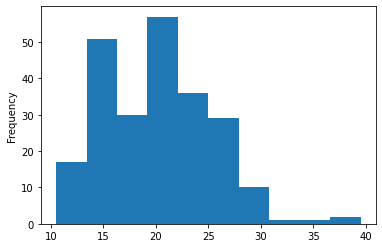

In [40]:
# 통합 연비에 대한 histogram 구하기 
# histogram : 값의 빈도를 막대 길이로 표현(5 간격으로 포함된 데이터 개수를 표현)
mpg['total'].plot.hist()

### 요약 통계량과 histogram을 통한 기초 분석
- (요약 통계량) total 연비의 평균과 중앙값이 약 20이다
- (histogram) total 연비가 20~22.5 사이인 자동차 모델이 가장 많다
- (통합) total 연비 대부분은 25이하이고, 25를 넘기는 것은 많지 않다

### 분석 결과를 바탕으로 20마일/갤런 이상인 자동차 모델에 대해 고연비 합격을 주기로 결정
---

### 2. 합격 판정 변수 만들기
- 고연비 합격 기준(20마일/갤런)을 적용하여 합격 판정 여부 변수 추가


| test 결과 | 기준 |
| ---  | ---  |
| pass    | 20이상|
| fail    | 20미만|


In [41]:
# 조건에 따라 서로 다른 값을 부여하기 위한 함수 사용을 위해 numpy 패키지를 로드함
import numpy as np

In [42]:
#np.where()의 사용법 1
#np.where(조건) => 결과로 조건을 만족하는 index 출력
np.where(mpg['total']>= 20 )

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  16,  23,  25,  26,  32,  33,  34,  35,  36,  37,  38,
         41,  42,  90,  91,  92,  93,  99, 100, 101, 102, 103, 104, 105,
        106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
        119, 120, 121, 141, 142, 143, 144, 145, 146, 147, 148, 149, 154,
        155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 179, 180, 181, 182, 183, 184, 185, 186,
        187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 207, 208,
        209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 220, 221, 222,
        223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233], dtype=int64),)

In [43]:
# np.where()의 사용법 2
# np.where(조건, 참일때 변환값, 거짓일때 변환값)
# total 값이 20 이상이면 'pass', 아니면 'fail' 값을 갖는 변수(컬럼) 'test'를 추가함
mpg['test'] = np.where(mpg['total'] >= 20, 'pass', 'fail')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,test
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,pass
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,pass
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,pass
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,pass
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,pass


### 빈도표로 합격 자동차 수 살펴보기
> - ##### df.value_counts() : 변수 값을 종류별로 값의 개수를 나타낸 표 만들기 
> - ##### 차트 그리기 


In [44]:
# 변수(컬럼) 분류 값에 대한 빈도 수
# test 변수는 'pass'와'fail' 값을 가지며, 각 분류 값을 갖는 데이터 빈도수 
mpg['test'].value_counts()  

pass    128
fail    106
Name: test, dtype: int64

> 'pass' 판정은 128대, 'fail' 판정은 106대

In [45]:
# test 변수는 'pass'와'fail' 값을 가지며, 각 분류 값을 갖는 데이터 빈도수 
# 분류 값을 갖는 데이터 빈도수 테이블을 별도로 저장
count_test = mpg['test'].value_counts()
count_test 

pass    128
fail    106
Name: test, dtype: int64

<AxesSubplot:>

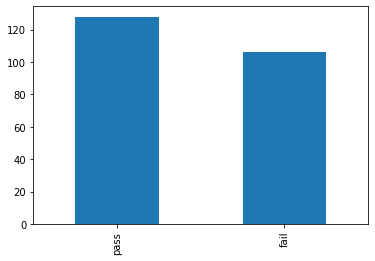

In [46]:
# 'pass'와'fail' 빈도 수를 막대 그래프로 그리기
count_test.plot.bar()

<AxesSubplot:>

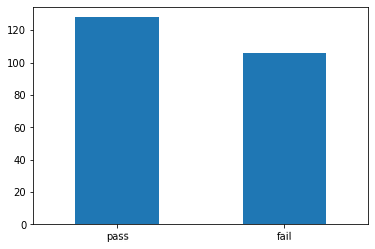

In [47]:
count_test.plot.bar(rot=1)

<AxesSubplot:>

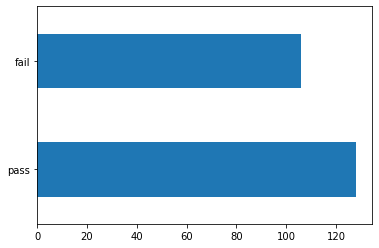

In [48]:
count_test.plot.barh()

<AxesSubplot:xlabel='test', ylabel='count'>

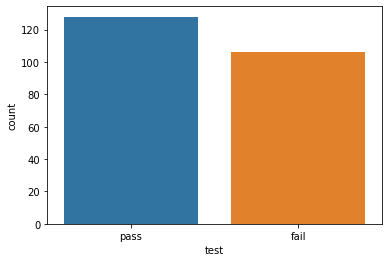

In [49]:
import seaborn as sns
sns.countplot(data=mpg, x= 'test')

---
## Lab 6 :  중첩 조건문 만들기
- np.where() 안에 np.where()를 중첩하여 분류하기
- 컬럼 total 연비를 기준에 따라 A, B, C 등급으로 분류
- 새로 분류 등급 변수(컬럼) grade를 만들어 total 연비에 따른 등급값을 부여함

| 등급 | 기준 |
| ---  | ---  |
| A    | 30이상|
| B    | 20~29|
| C    | 20미만|


In [50]:
# 통합 연비 값에 따라 A, B, C 등급으로 분류한 값을 갖는 'grade' 변수 추가
mpg['grade'] = np.where(mpg['total'] >= 30, 'A',
               np.where(mpg['total'] >= 20, 'B', 'C'))
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,test,grade
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,pass,B
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,pass,B
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,pass,B
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,pass,B
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,pass,B


> 빈도표와 막대 그래프로 연비 등급 살펴 보기

In [51]:
# 통합 연비 값에 따라 A, B, C 등급으로 분류된 데이터 개수 테이블 생성
count_grade = mpg['grade'].value_counts()
count_grade

B    118
C    106
A     10
Name: grade, dtype: int64

<AxesSubplot:>

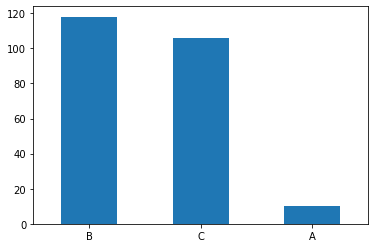

In [52]:
# 통합 연비 값에 따라 A, B, C 등급으로 분류된 데이터 개수 테이블로 막대 그래프 그리기
count_grade.plot.bar(rot=0)

<AxesSubplot:xlabel='grade', ylabel='count'>

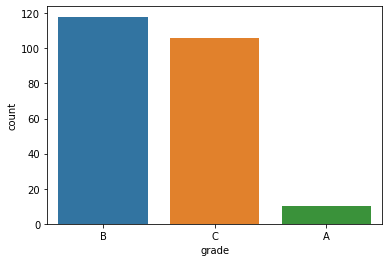

In [53]:
import seaborn as sns
sns.countplot(data=mpg, x='grade')

> 알파벳 순서로 막대 정렬하기

In [54]:
count_grade = mpg['grade'].value_counts().sort_index()  # 인덱스 값으로 정렬
count_grade

A     10
B    118
C    106
Name: grade, dtype: int64

<AxesSubplot:>

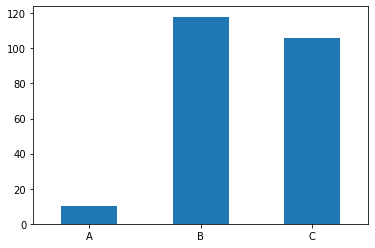

In [55]:
# 통합 연비 값에 따라 A, B, C 등급으로 분류된 데이터 개수 테이블로 막대 그래프 그리기
count_grade.plot.bar(rot=0)

---
### 여러 조건을 and/or 연결
#### category에 해당하는 행으로 변수 만들기
- 변수(컬럼) category 자동차 등급을 확인하고
- category가 'compactc', 'subcompact', '2seater'는 small, 나머지 차량은 large로 분류하여 'size' 변수(컬럼)으로 추가

> 차량 category 값 확인 하기

In [56]:
mpg[['category']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  234 non-null    object
dtypes: object(1)
memory usage: 2.0+ KB


In [57]:
# 'category'의 분류별 빈도수
mpg['category'].value_counts() 

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: category, dtype: int64

In [58]:
# 괄호에 주의
mpg['size'] = np.where((mpg['category'] == 'compact') |
                       (mpg['category'] == 'subcompact') |
                       (mpg['category'] == '2seater'), 'small', 'large')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,test,grade,size
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,pass,B,small
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,pass,B,small
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,pass,B,small
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,pass,B,small
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,pass,B,small


In [59]:
# 'size'의 분류별 빈도수
mpg['size'].value_counts()

large    147
small     87
Name: size, dtype: int64

In [60]:
# isin을 활용하여 파생 변수 만들기

mpg['size2'] = np.where(mpg['category'].isin(['compact', 'subcompact', '2seater']), 
                       'small', 'large')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,test,grade,size,size2
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,pass,B,small,small
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,pass,B,small,small
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,pass,B,small,small
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,pass,B,small,small
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,pass,B,small,small


---
## 실습 
- manufacturer가  hyundai,honda이면 'asia' 나머지이면 'non-asia' 라고 mpg['land'] 넣어라.
- mpg['land']의 bar graph를 그려라
---

### method chaining 메서드체이닝
- .을 이용하여 메서드를 계속 이어서 작성하는 방법
- 변수에 여러 메서드를 순서대로 적용할수 있다.
- 출력 결과를 변수에 할당하고 다시 불러오는 작업을 반복하지 않아도 된다.

In [61]:
#출력 결과를 변수에 할당하는 방법
df_1 = mpg['grade']
df_1 = df_1.value_counts()
df_1 = df_1.sort_index()
df_1

A     10
B    118
C    106
Name: grade, dtype: int64

In [62]:
# 메서드 체이닝을 사용한 경우
df_2 = mpg['grade'].value_counts().sort_index()
df_2

A     10
B    118
C    106
Name: grade, dtype: int64

---
### 얕은 복사(shallow copy) vs 깊은 복사(deep copy)  

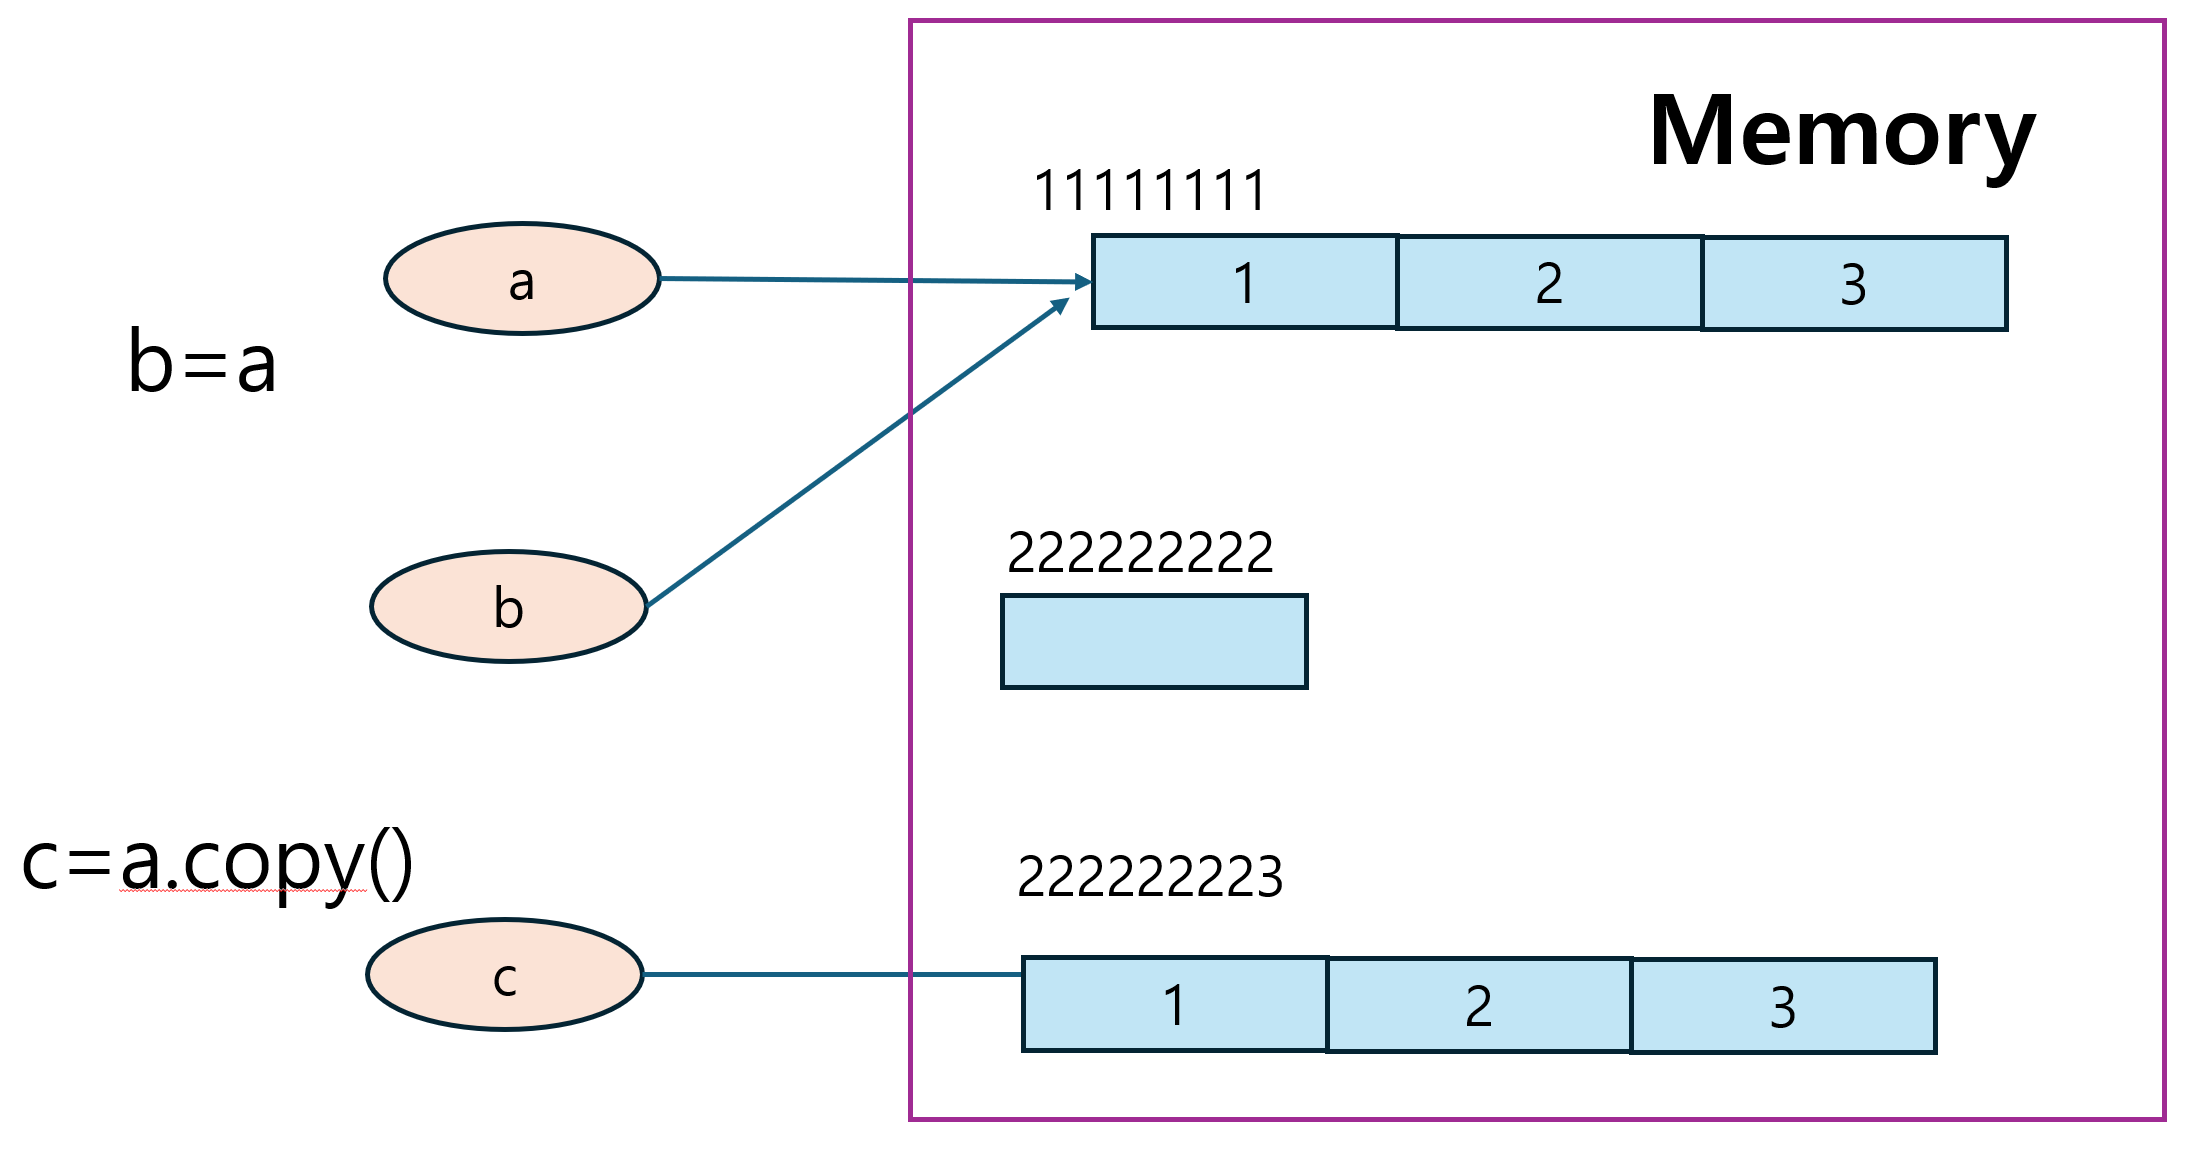

In [63]:
#얕은 복사 
a=[1,2,3,4]
print(a)
b=a
print(b)
b.append(6)
print(a,b)

[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4, 6] [1, 2, 3, 4, 6]


In [64]:
#깊은 복사 
a=[1,2,3,4]
c= a.copy()
a.append(100)
print(a, c)

[1, 2, 3, 4, 100] [1, 2, 3, 4]


--- 
### 정리하기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


<AxesSubplot:>

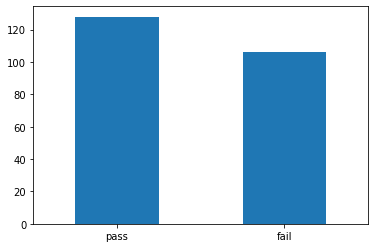

In [65]:
# 1. 패키지 로드
import pandas as pd
import numpy as np

# 2. 데이터 불러오기
mpg = pd.read_csv('mpg.csv')

# 3. 데이터 파악하기
mpg.head()      # 데이터 앞부분
mpg.tail()      # 데이터 뒷부분
mpg.shape       # 행, 열 수
mpg.info()      # 속성
mpg.describe()  # 요약 통계량

# 4. 변수명 바꾸기
mpg = mpg.rename(columns = {'manufacturer' : 'company'})

# 5. 파생변수 만들기
mpg['total'] = (mpg['cty'] + mpg['hwy'])/2                  # 변수 조합
mpg['test'] = np.where(mpg['total'] >= 20, 'pass', 'fail')  # 조건문 활용
mpg['grade'] = np.where(mpg['total'] >= 30, 'A',            # 중첩 조건문 활용
               np.where(mpg['total'] >= 20, 'B', 'C'))
mpg['size'] = np.where((mpg['category'] == 'compact') |     # 조건을 and/or 연결
                       (mpg['category'] == 'subcompact') |
                       (mpg['category'] == '2seater'), 'small', 'large')
 
# 6. 빈도 확인하기
count_test = mpg['test'].value_counts()  # 빈도표 만들기
count_test.plot.bar(rot = 0)             # 빈도 막대 그래프 만들기

##  Lab 7: 분석 도전
- midwest.csv는 미국 동북중부(East North Central States) 437개 지역의 인구 통계 정보를 담고 있음
- 지역별 아시아계  인구 비율이 높은 지역을 알아보려고 함
- bit.ly/easypy_52

> 데이터를 불러와서 데이터 특징을 파악하시오
1. 'midwest.csv'를 midwest 데이터 프레임으로 읽어오기 (midwest = pd.read_csv('midwest.csv'))
2. midwest 데이터의 행과 열의 갯수 파악 (midwest.shape)
3. 컬럼(변수)의 이름과 변수의 타입 등 파악 (midwest.info())
- poptotal : 해당 지역(state/county)의 총 인구 수
- popasian : 해당 지역(state/county)의 아시아계 인구 수

In [66]:
midwest = pd.read_csv('midwest.csv')

In [67]:
midwest.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,popother,percwhite,percblack,percamerindan,percasian,percother,popadults,perchsd,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,124,96.712059,2.575276,0.148283,0.376759,0.187623,43298,75.107395,19.631392,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,9,66.384340,32.900433,0.178807,0.451722,0.084698,6724,59.726353,11.243308,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,34,96.571276,2.861717,0.233473,0.106731,0.226803,9669,69.334988,17.033819,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,1139,95.254171,0.412257,0.149322,0.486918,3.697332,19272,75.472188,17.278954,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,6,90.198766,9.372858,0.239890,0.085675,0.102810,3979,68.861523,14.475999,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR


In [68]:
midwest.shape

(437, 28)

In [69]:
midwest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PID                   437 non-null    int64  
 1   county                437 non-null    object 
 2   state                 437 non-null    object 
 3   area                  437 non-null    float64
 4   poptotal              437 non-null    int64  
 5   popdensity            437 non-null    float64
 6   popwhite              437 non-null    int64  
 7   popblack              437 non-null    int64  
 8   popamerindian         437 non-null    int64  
 9   popasian              437 non-null    int64  
 10  popother              437 non-null    int64  
 11  percwhite             437 non-null    float64
 12  percblack             437 non-null    float64
 13  percamerindan         437 non-null    float64
 14  percasian             437 non-null    float64
 15  percother             4

> poptotal(전체 인구) 변수를 total로, popasian(아시아 계 인구수) 변수를 asian으로 수정하시오 

In [70]:
# poptotal(전체 인구) 변수 이름을 total로 변경
midwest = midwest.rename(columns={'poptotal' : 'total'})

In [71]:
# popasian(아시아 계 인구수) 변수를 asian으로 수정
midwest = midwest.rename(columns={'popasian' : 'asian'})

In [72]:
# 결측치, 데이터 타입, 데이터 개수 등 파악
midwest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PID                   437 non-null    int64  
 1   county                437 non-null    object 
 2   state                 437 non-null    object 
 3   area                  437 non-null    float64
 4   total                 437 non-null    int64  
 5   popdensity            437 non-null    float64
 6   popwhite              437 non-null    int64  
 7   popblack              437 non-null    int64  
 8   popamerindian         437 non-null    int64  
 9   asian                 437 non-null    int64  
 10  popother              437 non-null    int64  
 11  percwhite             437 non-null    float64
 12  percblack             437 non-null    float64
 13  percamerindan         437 non-null    float64
 14  percasian             437 non-null    float64
 15  percother             4

> total, asin 변수를 활용하여 '전체 인구 대비 안시아 인구 백분율'을 구하여 변수 rate를 저장하고 히스토 그램으로 분포 살펴보기

In [73]:
# 전체 인구(total) 대비 안시아 인구(asian) 백분율 구하기
midwest['rate'] = (midwest['asian'] / midwest['total']) * 100

In [74]:
midwest.head()

,PID,county,state,area,total,popdensity,popwhite,popblack,popamerindian,asian,popother,percwhite,percblack,percamerindan,percasian,percother,popadults,perchsd,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,rate
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,124,96.712059,2.575276,0.148283,0.376759,0.187623,43298,75.107395,19.631392,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,0.376759
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,9,66.384340,32.900433,0.178807,0.451722,0.084698,6724,59.726353,11.243308,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,0.451722
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,34,96.571276,2.861717,0.233473,0.106731,0.226803,9669,69.334988,17.033819,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,0.106731
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,1139,95.254171,0.412257,0.149322,0.486918,3.697332,19272,75.472188,17.278954,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,0.486918
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,6,90.198766,9.372858,0.239890,0.085675,0.102810,3979,68.861523,14.475999,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,0.085675


In [75]:
# 데이터 프레임 midwest에서 ['county', 'state', 'total', 'asian', 'rate'] 컬럼(변수) 확인
midwest[['county', 'state', 'total', 'asian', 'rate']].head()

,county,state,total,asian,rate
0,ADAMS,IL,66090,249,0.376759
1,ALEXANDER,IL,10626,48,0.451722
2,BOND,IL,14991,16,0.106731
3,BOONE,IL,30806,150,0.486918
4,BROWN,IL,5836,5,0.085675


<AxesSubplot:ylabel='Frequency'>

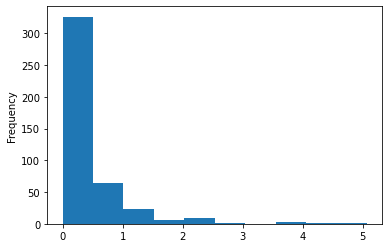

In [76]:
# 전체 인구(total) 대비 안시아 인구(asian) 백분율 빈도수 확인
midwest['rate'].plot.hist()
 

In [77]:
# 데이터 프레임 midwest의 전체 인구(total) 대비 안시아 인구(asian) 백분율 요약통계량 구하기
midwest['rate'].describe()

count    437.000000
mean       0.487246
std        0.627856
min        0.000000
25%        0.173739
50%        0.297170
75%        0.521161
max        5.070452
Name: rate, dtype: float64

> 아시안 인구 전체 백분율을 구하고 평균을 초과하면 'large' 그 외에는 'small'을 부여하는 변수 group 생성

In [78]:
# 데이터 프레임 midwest의 전체 인구(total) 대비 아시안 인구(asian) 백분율 평균 구하기
midwest['rate'].mean()

0.48724618343573406

In [79]:
# 전체 인구(total) 대비 아시안 인구(asian) 백분율 
# 평균 값 보다 크면 large 작으면 small 값을 갖는 파생 변수 asiangroup 생성
midwest['asiangroup'] = np.where(midwest['rate'] > 0.4872, 'large', 'small')  # 평균 값

In [80]:
# 변수 group의 값에 따른 빈도수 출력
midwest['asiangroup'].value_counts()

small    318
large    119
Name: asiangroup, dtype: int64

> 'large'와 'small' 해당 지역이 얼마나 많은지 빈도표와 막대 그래프를 만드시오

<AxesSubplot:>

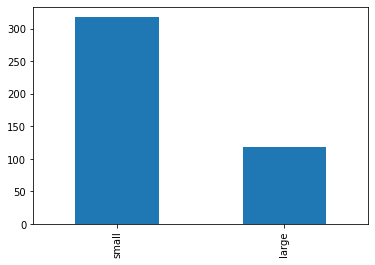

In [81]:
# 변수 group의 값에 따른 빈도수 표를 막대 그래프로 작성
count_group = midwest['asiangroup'].value_counts()
count_group.plot.bar()

<AxesSubplot:xlabel='asiangroup', ylabel='count'>

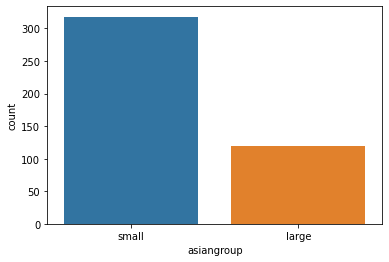

In [82]:
sns.countplot(data = midwest, x='asiangroup')


## Summary
> #### 05-1 데이터 파악하기 
> - head(), tail(), describe()등
> #### 05-2 변수명 바꾸기 
> - df.rename(columns = {'old':'new'})
> #### 05-3 파생변수 만들기
> - df['col1'] = np.where(조건, 참일때 값, 거짓일때 값)
---

##  Lab 8: 안보고 분석 도전
- midwest.csv는 미국 동북중부(East North Central States) 437개 지역의 인구 통계 정보를 담고 있음
- 지역별 아시아계  인구 비율이 높은 지역을 알아보려고 함
- bit.ly/easypy_52

> 데이터를 불러와서 데이터 특징을 파악하시오
> 1. 'midwest.csv'를 midwest 데이터 프레임으로 읽어오기 (midwest = pd.read_csv('midwest.csv'))
> 2. midwest 데이터의 행과 열의 갯수 파악 (midwest.shape)
> 3. 컬럼(변수)의 이름과 변수의 타입 등 파악 (midwest.info())
> - poptotal : 해당 지역(state/county)의 총 인구 수
> - popasian : 해당 지역(state/county)의 아시아계 인구 수

In [83]:
# midwest.csv를 읽어와서 midwest라는 변수에 저장한다. 


In [84]:
# midwest의 초기 5행을 확인한다.


In [85]:
#midwest의 행과 열의 갯수 파악


In [86]:
#midwest의 컬럼의 이름과 변수의 타입등 파악

> poptotal(전체 인구) 변수를 total로, popasian(아시아 계 인구수) 변수를 asian으로 수정하시오 

In [87]:
# poptotal(전체 인구) 변수 이름을 total로 변경


In [88]:
# popasian(아시아 계 인구수) 변수를 asian으로 수정 


In [89]:
# 결측치, 데이터 타입, 데이터 개수 등 파악


> total, asian 변수를 활용하여 '전체 인구 대비 안시아 인구 백분율'을 구하여 변수 rate를 저장하고 히스토 그램으로 분포 살펴보기

In [90]:
# 전체 인구(total) 대비 안시아 인구(asian) 백분율 구하기 


In [91]:
# midwest의 초기 5행 확인하기


In [92]:
# 데이터 프레임 midwest에서 ['county', 'state', 'total', 'asian', 'rate'] 컬럼(변수) 확인 


In [93]:
# 전체 인구(total) 대비 안시아 인구(asian) 백분율 빈도수 확인


In [94]:
# 데이터 프레임 midwest의 전체 인구(total) 대비 안시아 인구(asian) 백분율 요약통계량 구하기


> 아시안 인구 전체 백분율을 구하고 평균을 초과하면 'large' 그 외에는 'small'을 부여하는 변수 group 생성

In [95]:
# 데이터 프레임 midwest의 전체 인구(total) 대비 안시아 인구(asian) 백분율 평균 구하기


In [96]:
# 전체 인구(total) 대비 안시아 인구(asian) 백분율 
# 평균 값 보다 크면 large 작으면 small 값을 갖는 파생 변수 asiangroup 생성


In [97]:
# 변수 asiangroup의 값에 따른 빈도수 출력


> 'large'와 'small' 해당 지역이 얼마나 많은지 빈도표와 막대 그래프를 만드시오

In [98]:
# 변수 asiangroup의 값에 따른 빈도수 표를 막대 그래프로 작성

# 동일한 것을 seaborn을 사용해서 막대그래프로 작성
